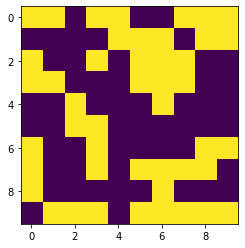

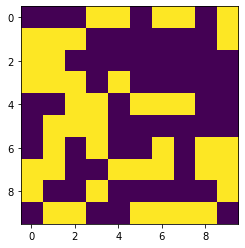

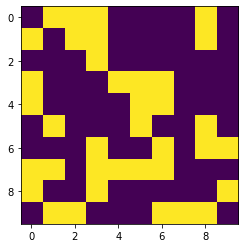

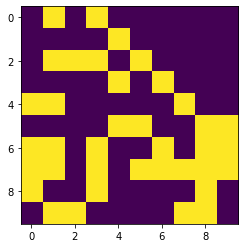

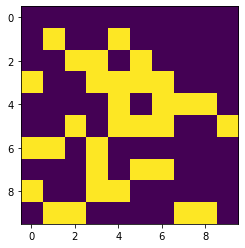

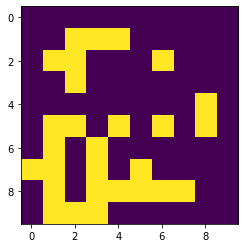

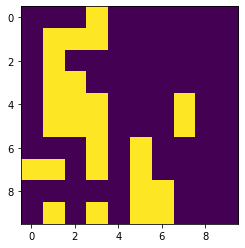

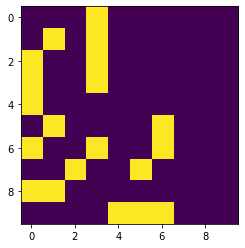

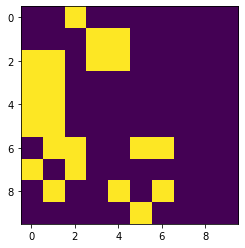

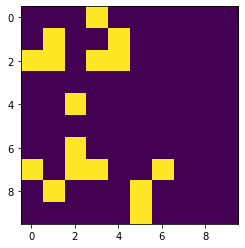

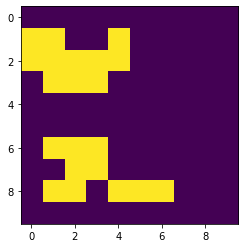

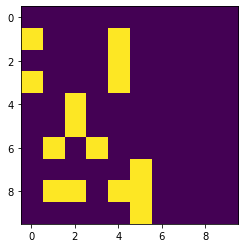

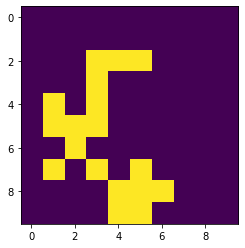

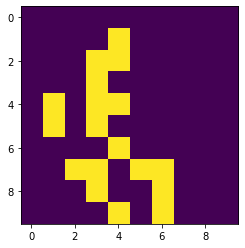

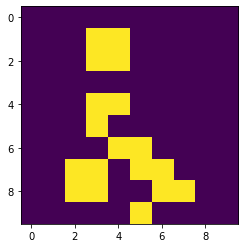

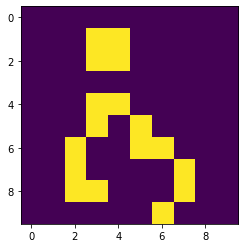

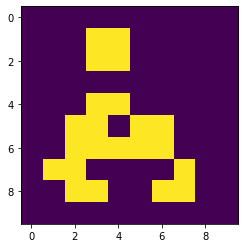

In [ ]:
import numpy as np
from random import randint
import os
import time
import keyboard
import matplotlib.pyplot as plt


class field:
    array = np.array(())

    def __init__(self, n=10, m=10):
        self.width = n
        self.length = m
        self.array = np.array([[randint(0, 1) for _ in range(self.width)] for _ in range(self.length)])


class life_game:
    field = field()

    def __init__(self):
        pass

    def get_neighbours(self):

        array_expanded = np.hstack((np.zeros((1, self.field.width)).reshape(self.field.width, 1),
                                    self.field.array, np.zeros((1, self.field.width)).reshape(self.field.width, 1)))
        array_expanded = np.vstack(
            (np.zeros((self.field.length + 2)), array_expanded, np.zeros((self.field.length + 2))))
        neighbours = np.zeros((self.field.length, self.field.width))
        neighbours += array_expanded[2:, 1:-1] + array_expanded[:-2, 1:-1] + array_expanded[1:-1, 2:] + array_expanded[
                                                                                                        1:-1, :-2]
        neighbours += array_expanded[:-2, :-2] + array_expanded[:-2, 2:] + array_expanded[2:, :-2] + array_expanded[2:,
                                                                                                     2:]

        return neighbours

    def selection(self, neighbours):

        return (((neighbours == 2) & (self.field.array == 1)) + (neighbours == 3)).astype(int)

    def show(self):
        os.system('cls' if os.name == 'nt' else 'clear')
        #print('Press space to finish') # for cmd run
        fig = plt.imshow(self.field.array) # for jupyter lab run
        plt.show()
        time.sleep(0.7)
        
    def step(self):

        neighbours = self.get_neighbours()
        self.field.array = self.selection(neighbours)

    def start(self):

        is_constant = False
        is_null = False

        while not (is_constant or is_null):
            array_previous = np.copy(self.field.array)
            self.step()
            self.show()
            is_constant = np.array_equal(array_previous,
                                         self.field.array)  # проверка на равенство текущего и предыдущего состяний
            is_null = np.array_equal(self.field.array, np.zeros(
                (self.field.length, self.field.width)))  # проверка на наличие живых организмов
            
            #if keyboard.is_pressed(' '):                   # for cmd run
            #    print('Game is finished forcedly!')        # for cmd run
            #    break                                      # for cmd run

        if is_constant:
            print('Игра окончена. Поле статично.')
        if is_null:
            print('Игра окончена. Поле пусто.')


a = life_game()

try:
    a.start()
except Exception:
    print('Sorry! Something went wrong...')
